In [1]:
import read_data_old_version
import set_hyper_paras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from roc import roc_curve,get_auc_score
%matplotlib inline

In [2]:
X,y = read_data_old_version.get_train_data()
X_test,y_test = read_data_old_version.get_test_data()
print(X.shape,X_test.shape)

(10262, 40) (2566, 40)


In [4]:
from sklearn.metrics import fbeta_score, make_scorer
fbeta_micro = make_scorer(fbeta_score, beta=2,average='micro')

0.8817969206782303
0.8749025720966485
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2249
           1       0.33      0.02      0.04       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.87      0.87      0.87      2566
   macro avg       0.30      0.25      0.24      2566
weighted avg       0.80      0.87      0.82      2566



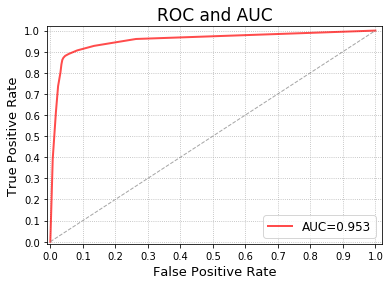

0.9531548213168709


In [8]:
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score
param_distribs = {
        'n_neighbors': randint(low=1, high=20),
        'leaf_size': randint(low=15, high=60),
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
knn_clf = KNeighborsClassifier()
rnd_search_fb = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search_fb.fit(X,y)
set_hyper_paras.set_section('knn',rnd_search_fb.best_params_)
print(accuracy_score(rnd_search_fb.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search_fb.best_estimator_.predict(X_test),y_test))

target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search_fb.best_estimator_.predict(X_test), target_names=target_names))

roc_curve(X_test,y_test,rnd_search_fb.best_estimator_,average = 'micro')
print(get_auc_score(X_test,y_test,rnd_search_fb.best_estimator_,average = 'micro'))

0.8800428766322355
0.8764614185502728
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2249
           1       0.00      0.00      0.00       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.88      0.88      0.88      2566
   macro avg       0.22      0.25      0.23      2566
weighted avg       0.77      0.88      0.82      2566



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


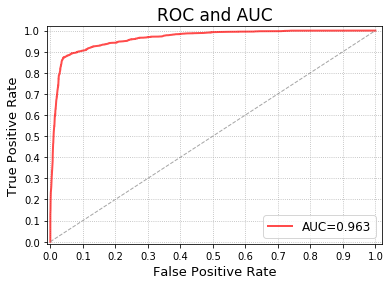

0.9626451445415972


In [10]:
import numpy as np
from scipy.stats import uniform
from sklearn.ensemble import AdaBoostClassifier
param_distribs = {
        'n_estimators': randint(low=10, high=80),
        'learning_rate': np.random.uniform( 0.1 , 1.5 , 100 ),
        'algorithm' : ['SAMME', 'SAMME.R']
    }
ada_clf = AdaBoostClassifier()
rnd_search = RandomizedSearchCV(ada_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring='accuracy', random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('ada_boost',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))

roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

0.8800428766322355
0.8764614185502728
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2249
           1       0.00      0.00      0.00       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.88      0.88      0.88      2566
   macro avg       0.22      0.25      0.23      2566
weighted avg       0.77      0.88      0.82      2566



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


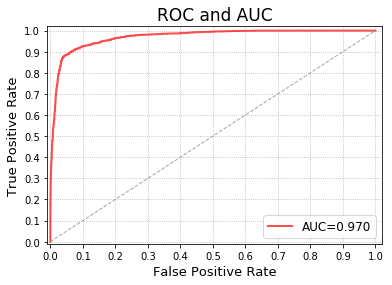

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
        'max_depth': randint(low=1, high=10),
        'min_samples_split': randint(low=1, high=10),
        'min_samples_leaf': randint(low=2, high=10)
    }
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('random_forest',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')

0.8764614185502728
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2249
           1       0.00      0.00      0.00       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.88      0.88      0.88      2566
   macro avg       0.22      0.25      0.23      2566
weighted avg       0.77      0.88      0.82      2566



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


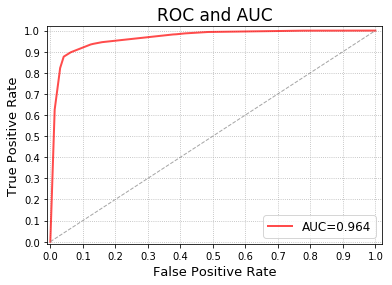

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
param_distribs = {
        'criterion':['entropy'],
        'max_depth': randint(low=1, high=40),
        'min_samples_split': randint(low=1, high=10),
    }
rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('c4_5',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')

0.8764614185502728
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2249
           1       0.00      0.00      0.00       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.88      0.88      0.88      2566
   macro avg       0.22      0.25      0.23      2566
weighted avg       0.77      0.88      0.82      2566



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


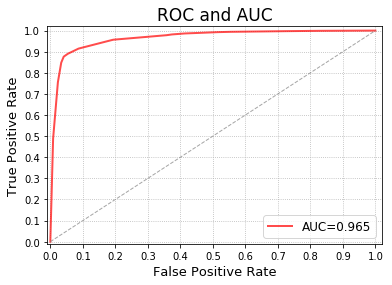

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
param_distribs = {
        'criterion':['gini'],
        'max_depth': randint(low=1, high=40),
        'min_samples_split': randint(low=1, high=10),
    }
rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('cart',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')

0.8745128604832424
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2249
           1       0.33      0.04      0.08       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.87      0.87      0.87      2566
   macro avg       0.30      0.26      0.25      2566
weighted avg       0.80      0.87      0.83      2566



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


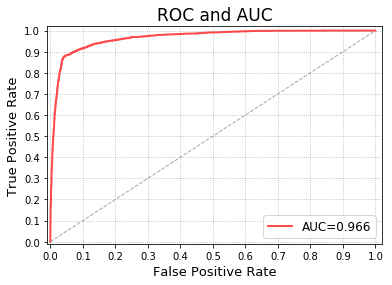

In [16]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
param_distribs = {
        'max_depth': randint(low=1, high=10),  
        'learning_rate': np.random.uniform( 0.1 , 1.5 , 100),
        'n_estimators': randint(low=50, high=200),
        'n_jobs':[-1],
        'booster':['gbtree', 'gblinear' ,'dart']
    }
rnd_search = RandomizedSearchCV(xgboost, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('xgboost',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8741231488698363
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2249
           1       0.19      0.01      0.02       246
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        20

   micro avg       0.87      0.87      0.87      2566
   macro avg       0.27      0.25      0.24      2566
weighted avg       0.79      0.87      0.82      2566



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


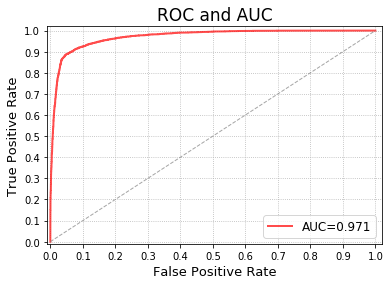

In [17]:
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
import numpy as np

param_distribs = {
        'C': np.random.uniform( 0.1 , 1.5 , 50 ),
        'penalty' : ['l1', 'l2'],
        'max_iter': randint(low=10,high=200),
    }
lg_reg = LogisticRegression()
rnd_search = RandomizedSearchCV(lg_reg, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('logistic',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')

0.8694466095089634
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2249
           1       0.27      0.05      0.08       246
           2       0.11      0.02      0.03        51
           3       0.12      0.05      0.07        20

   micro avg       0.87      0.87      0.87      2566
   macro avg       0.35      0.28      0.28      2566
weighted avg       0.80      0.87      0.83      2566

0.9677835362081475


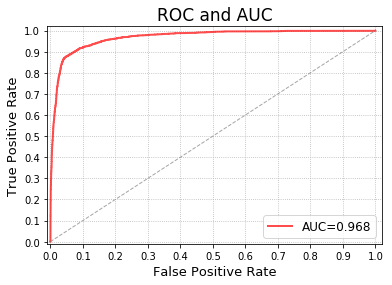

In [18]:
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

param_distribs = {
        'learning_rate': np.random.uniform( 0.01 , 1.0 , 50 ),
        'n_estimators': randint(low=10,high=200),
        'max_depth': randint(low=1,high=10),
        'min_samples_split': randint(low=2,high=5),
        
    }
gbdt = GradientBoostingClassifier()
rnd_search = RandomizedSearchCV(gbdt, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('gbdt',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')